# Reachability

## Degree centrality

![degree_figure](figures/Figure3_0.jpeg)

In [1]:
# degree centrality
import networkx as nx
from networkx.algorithms.centrality import degree_centrality

G = nx.Graph()
nodes = list(range(7))
G.add_nodes_from(nodes)
G.add_edges_from([(0, 1), (0, 2),
                  (1, 2),(1, 3), 
                  (2, 3), (2, 4),
                  (3, 5), (3,6)                  
                 ])
# print(G)
print(degree_centrality(G))

{0: 0.3333333333333333, 1: 0.5, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666}


## Eccentricity

![eccentricity_figure](figures/Figure3_1.jpeg)

In [2]:
# eccentricity
import networkx as nx
from networkx.algorithms.distance_measures import eccentricity
G = nx.Graph()
nodes = list(range(20))
G.add_nodes_from(nodes)
G.add_edges_from([(0, 1), (0, 2),(0, 7), (0, 8),
                  (0, 9), (0, 10),(0, 11),
                  (1, 3),(1, 12), 
                  (2, 3), (2, 13),
                  (3, 4),(3, 5), (3,6),
                  (12,14), (12,15), (12,16),
                  (13,17), (12,18), (12,19)
                 ])
# print(G)
print(eccentricity(G))


{0: 3, 1: 4, 2: 4, 3: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 5, 13: 5, 14: 6, 15: 6, 16: 6, 17: 6, 18: 6, 19: 6}


## closeness

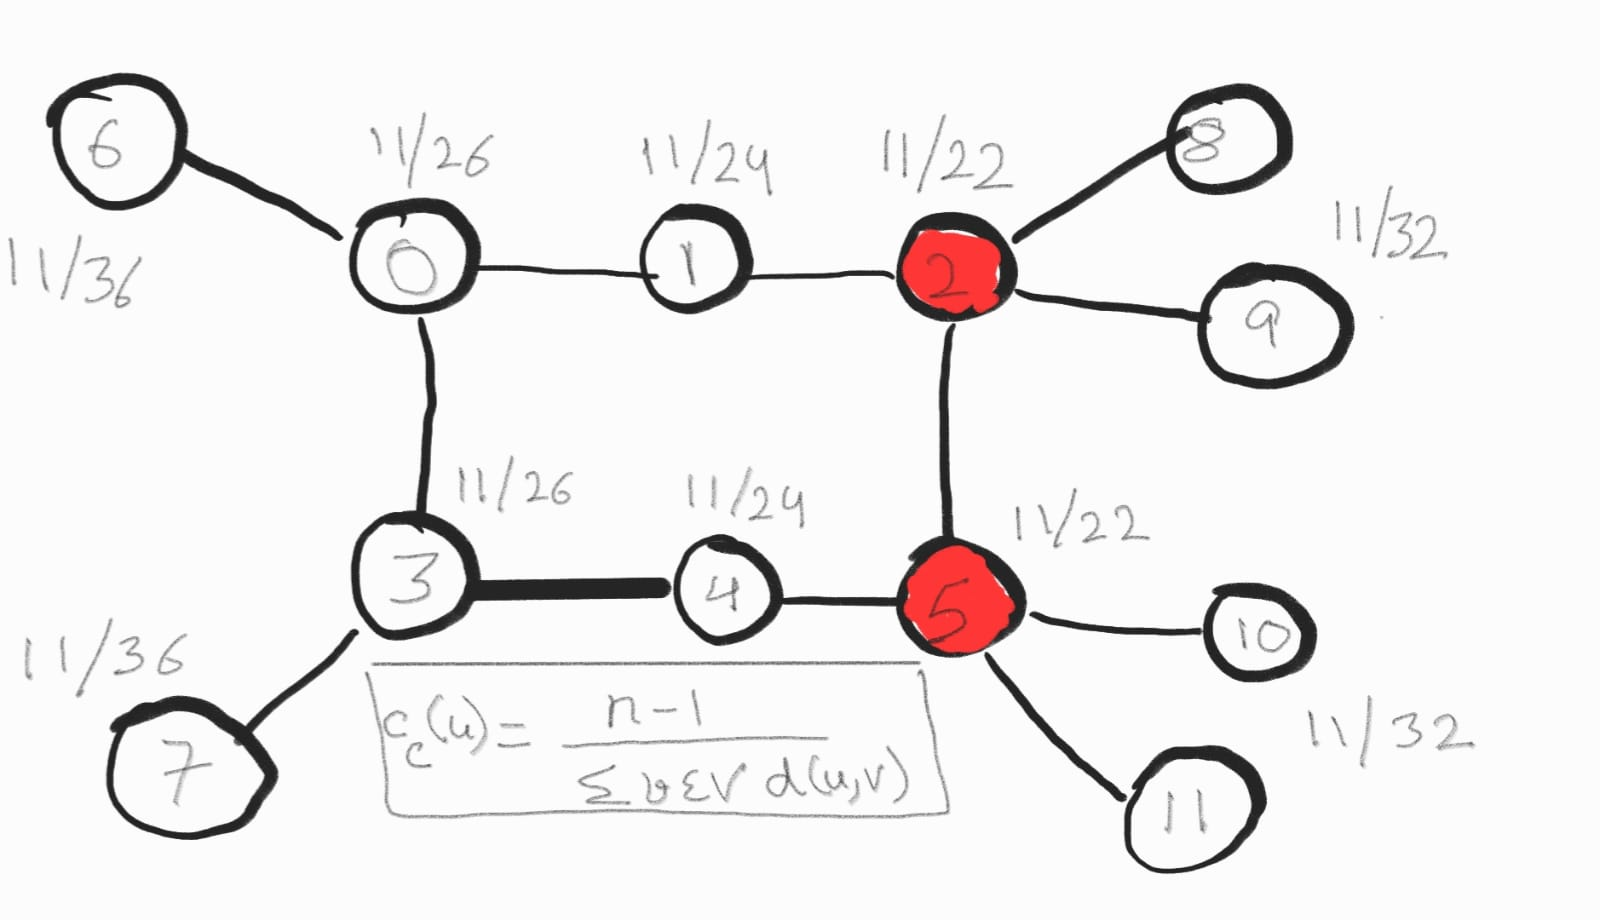

In [3]:
# closeness
import networkx as nx
from networkx.algorithms.centrality import closeness_centrality,incremental_closeness_centrality
G = nx.Graph()
# prepare graph
nodes = list(range(12))
G.add_nodes_from(nodes)
G.add_edges_from([(0,1),(0,3), (0,6),
                  (1,2),
                  (2,5), (2,8),(2,9),
                  (3,4), (3,7),
                  (4,5),
                  (5,10), (5,11)
                 ])
print(G)
# calculate closeness
print(closeness_centrality(G))
# print(incremental_closeness_centrality(G))

Graph with 12 nodes and 12 edges
{0: 0.4230769230769231, 1: 0.4583333333333333, 2: 0.5, 3: 0.4230769230769231, 4: 0.4583333333333333, 5: 0.5, 6: 0.3055555555555556, 7: 0.3055555555555556, 8: 0.34375, 9: 0.34375, 10: 0.34375, 11: 0.34375}


## centroid value

![eccentricity_figure](figures/Figure3_3.jpeg)

In [4]:
# centroid

import networkx as nx
G = nx.Graph()

# calculate advantage of node2 in comparison to node1  
def calculate_competetive_advantage(G, node1, node2, shortest_path_lengths=None):
        """
        # competetive advantage(x,y) = #nodes closer to y - #nodes closer to x  
        """
        if not shortest_path_lengths:
            shortest_path_lengths =dict(nx.all_pairs_shortest_path_length(G))
        node1_distances = shortest_path_lengths[node1]
        node2_distances = shortest_path_lengths[node2]
        all_nodes = [node for node in node1_distances.keys()]
        node1_advantage = sum([1 for node in all_nodes 
                               if node1_distances[node] < node2_distances[node]])
        node2_advantage = sum([1 for node in all_nodes 
                               if node1_distances[node] > node2_distances[node]])
        competetive_advantage = node2_advantage - node1_advantage  
        return competetive_advantage

def get_centroid_values(G) -> dict:
    centroid_dict = {}
    shortest_path_lengths =dict(nx.all_pairs_shortest_path_length(G))
    for preference_node in shortest_path_lengths.keys():
        centroid_value = min([calculate_competetive_advantage(G, node, preference_node, shortest_path_lengths) 
                              for node in shortest_path_lengths.keys() if node != 0])
        centroid_dict[preference_node] = centroid_value
    return centroid_dict
    
# prepare graph
nodes = list(range(12))
G.add_nodes_from(nodes)
G.add_edges_from([(0,1),(0,2), (0,3), (0,4),(0,5), (0,6),
                  (1,7), (2,7), (3,8), (4,8), (5,9), (6,9), 
                  (7,10), (8,10), (9,10),
                  (10,11), (10,12)
                 ])
# calculate shortest path between nodes
# shortest_path_lengths =dict(nx.all_pairs_shortest_path_length(G))
c_dict = get_centroid_values(G)
print(c_dict)

{0: 1, 1: -3, 2: -3, 3: -3, 4: -3, 5: -3, 6: -3, 7: -5, 8: -5, 9: -5, 10: 0, 11: -11, 12: -11}
